In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
path = '../Data/chicago/cycling_safety_chicago.csv'

df = pd.read_csv(path)

In [3]:
list(df.keys())

['Unnamed: 0',
 'CRASH_RECORD_ID',
 'RD_NO',
 'CRASH_DATE_EST_I',
 'CRASH_DATE',
 'POSTED_SPEED_LIMIT',
 'TRAFFIC_CONTROL_DEVICE',
 'DEVICE_CONDITION',
 'WEATHER_CONDITION',
 'LIGHTING_CONDITION',
 'FIRST_CRASH_TYPE',
 'TRAFFICWAY_TYPE',
 'LANE_CNT',
 'ALIGNMENT',
 'ROADWAY_SURFACE_COND',
 'ROAD_DEFECT',
 'REPORT_TYPE',
 'CRASH_TYPE',
 'INTERSECTION_RELATED_I',
 'NOT_RIGHT_OF_WAY_I',
 'HIT_AND_RUN_I',
 'DAMAGE',
 'DATE_POLICE_NOTIFIED',
 'PRIM_CONTRIBUTORY_CAUSE',
 'SEC_CONTRIBUTORY_CAUSE',
 'STREET_NO',
 'STREET_DIRECTION',
 'STREET_NAME',
 'BEAT_OF_OCCURRENCE',
 'PHOTOS_TAKEN_I',
 'STATEMENTS_TAKEN_I',
 'DOORING_I',
 'WORK_ZONE_I',
 'WORK_ZONE_TYPE',
 'WORKERS_PRESENT_I',
 'NUM_UNITS',
 'MOST_SEVERE_INJURY',
 'INJURIES_TOTAL',
 'INJURIES_FATAL',
 'INJURIES_INCAPACITATING',
 'INJURIES_NON_INCAPACITATING',
 'INJURIES_REPORTED_NOT_EVIDENT',
 'INJURIES_NO_INDICATION',
 'INJURIES_UNKNOWN',
 'CRASH_HOUR',
 'CRASH_DAY_OF_WEEK',
 'CRASH_MONTH',
 'LATITUDE',
 'LONGITUDE',
 'LOCATION',
 'Date'

In [25]:
df.LOCATION.sample(20)

755      POINT (-87.68336292252 41.854004777584)
4148    POINT (-87.620227855065 41.765519043532)
79        POINT (-87.7464713988 41.886578275155)
4757    POINT (-87.684492394499 41.894013756589)
1810    POINT (-87.664410492891 41.956229834343)
3138    POINT (-87.630622884334 41.869057497035)
2019    POINT (-87.664220102048 41.869188082212)
725     POINT (-87.650868796101 41.893226268739)
5295    POINT (-87.679205887162 41.964260547715)
653     POINT (-87.684313325796 41.890810447097)
1688     POINT (-87.65100156848 41.918252049629)
5241    POINT (-87.711951329036 41.913770262524)
857     POINT (-87.624120178402 41.859640854667)
2496    POINT (-87.729323368202 41.789420942558)
2230     POINT (-87.627377031854 41.87174546459)
3123     POINT (-87.69267507525 41.791803082466)
2766    POINT (-87.632095536704 41.787175172589)
1971    POINT (-87.680939146663 41.957505176618)
3040    POINT (-87.695252593724 41.844800785514)
2194    POINT (-87.703542099988 41.926561291566)
Name: LOCATION, dtyp

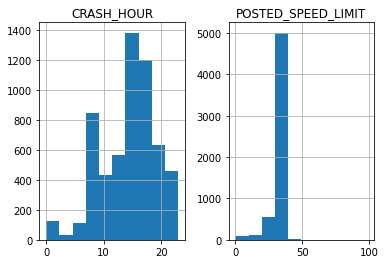

In [15]:
df[['CRASH_HOUR','POSTED_SPEED_LIMIT']].hist()
plt.show()

# df[['LIGHTING_CONDITION','MOST_SEVERE_INJURY']].hist()
# plt.show()

# df['DOORING_I'].hist()
# plt.show()

In [16]:
df.MOST_SEVERE_INJURY.value_counts()

NONINCAPACITATING INJURY    2608
NO INDICATION OF INJURY     1956
REPORTED, NOT EVIDENT        664
INCAPACITATING INJURY        512
FATAL                         16
Name: MOST_SEVERE_INJURY, dtype: int64

In [10]:
#assign values to injury categories

df['MSI_num'] = 0 #0 will be "NO INDICATION OF INJURY"

I = df.MOST_SEVERE_INJURY == 'REPORTED, NOT EVIDENT'
df.loc[I,'MSI_num'] = 1
I = df.MOST_SEVERE_INJURY == 'NONINCAPACITATING INJURY'
df.loc[I,'MSI_num'] = 2
I = df.MOST_SEVERE_INJURY == 'INCAPACITATING INJURY'
df.loc[I,'MSI_num'] = 3
I = df.MOST_SEVERE_INJURY == 'FATAL'
df.loc[I,'MSI_num'] = 4

<AxesSubplot: >

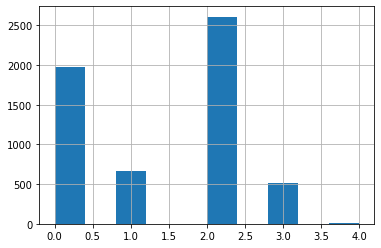

In [11]:
df.MSI_num.hist()

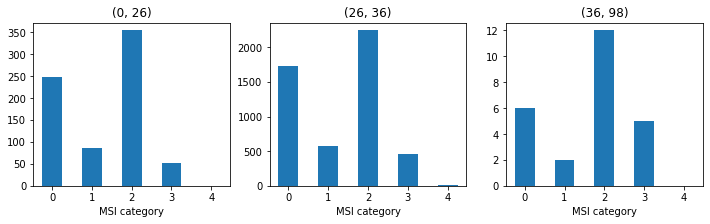

In [14]:
speed_r = [(0,26),(26,36),(36,98)]
Ns = len(speed_r)

fig,ax = plt.subplots(1,Ns,figsize=(Ns*4,3))

edges = np.arange(-0.5,4.5+1,1)
bins = edges[:-1]+0.5

for ii,sr in enumerate(speed_r):
    I1 = df.POSTED_SPEED_LIMIT >= sr[0]
    I2 = df.POSTED_SPEED_LIMIT < sr[1]
    ax[ii].hist(df.loc[I1&I2,'MSI_num'].values,bins=edges,rwidth=0.5)
    ax[ii].set_title(sr)
    ax[ii].set_xlabel('MSI category')
    
plt.show()

In [21]:
df.CRASH_DATE.sample(20)

929     10/02/2019 09:50:00 AM
2217    07/06/2017 02:30:00 PM
3337    08/31/2017 10:20:00 AM
4441    10/26/2016 01:35:00 PM
5154    07/30/2019 07:10:00 PM
2242    08/19/2019 04:28:00 PM
4583    08/30/2018 07:30:00 PM
5495    05/17/2018 02:23:00 PM
1520    08/28/2019 08:05:00 PM
4424    06/06/2019 06:30:00 PM
4436    02/20/2020 09:00:00 AM
1087    10/16/2017 03:25:00 PM
3604    10/07/2018 02:40:00 AM
2202    06/24/2019 12:00:00 PM
4799    11/01/2017 08:30:00 AM
3800    05/18/2019 03:57:00 PM
4323    10/11/2019 02:59:00 PM
4174    06/28/2018 07:50:00 PM
5579    07/27/2017 08:03:00 AM
1275    07/20/2019 05:54:00 PM
Name: CRASH_DATE, dtype: object